In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dec = pd.read_csv("Company_Data (1).csv")

In [3]:
dec.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
dec.shape

(400, 11)

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [12]:
lab_enc = preprocessing.LabelEncoder()
dec['ShelveLoc'] = lab_enc.fit_transform(dec['ShelveLoc'])

In [10]:
lab_enc = preprocessing.LabelEncoder()
dec['Urban'] = lab_enc.fit_transform(dec['Urban'])

In [11]:
lab_enc = preprocessing.LabelEncoder()
dec['US'] = lab_enc.fit_transform(dec['US'])

In [13]:
dec.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [17]:
X = dec.iloc[:,0:9].values
y = dec.iloc[:,-1].values

In [18]:
X

array([[  9.5 , 138.  ,  73.  , ...,   0.  ,  42.  ,  17.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,  65.  ,  10.  ],
       [ 10.06, 113.  ,  35.  , ...,   2.  ,  59.  ,  12.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   2.  ,  40.  ,  18.  ],
       [  5.94, 100.  ,  79.  , ...,   0.  ,  50.  ,  12.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,  49.  ,  16.  ]])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[23,  8],
       [ 6, 63]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.86

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.89      0.91      0.90        69

    accuracy                           0.86       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.86      0.86      0.86       100



In [27]:
y_pred1 = model.predict(X_train)

In [28]:
accuracy_score(y_train,y_pred1)

1.0

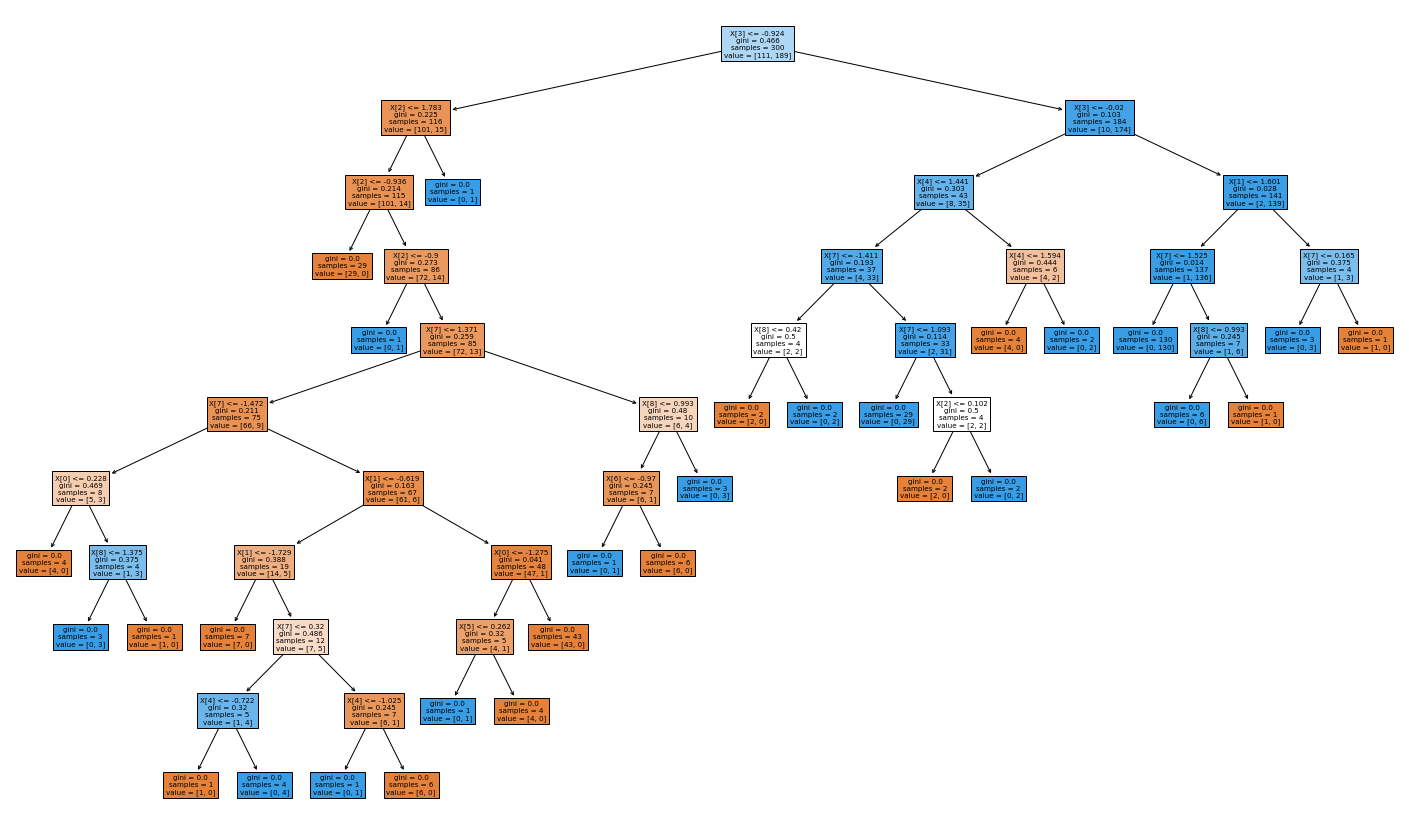

In [29]:
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

plt.show()